# `morphon` usage examples

## Displaying cells

### Simple plot

Load morphology file [in.swc](./in.swc)

In [1]:
from morphon import Morpho, plot
m = Morpho('in.swc')

Plot (x, y) coordinates of morphological data.

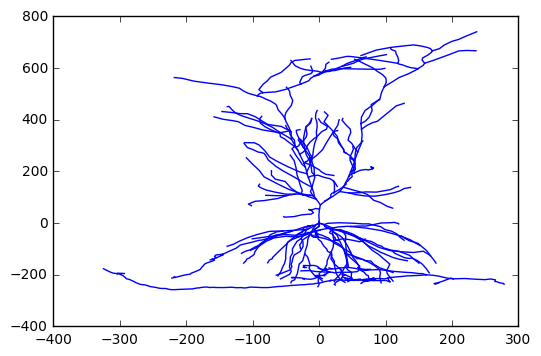

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
plot(m, ax)

### Simple 3D plot

In [3]:
from morphon import Morpho
m = Morpho('in.swc')

In [4]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

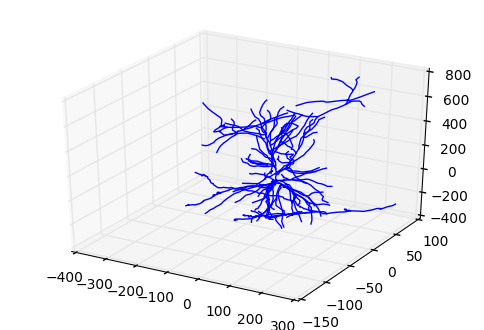

In [5]:
from morphon import plot
fig = plt.figure()
ax = fig.gca(projection='3d')
plot(m, ax, projection='3d')

### Plotting neurites

In [6]:
from morphon import Morpho, plot
m = Morpho('in.swc')

In [7]:
neurites = set(m.neurite(i) for i in m.points())
colors = {'soma': 'black', 'dend': 'blue', 'apic': 'green', 'axon': 'red'}
thickness = {'soma': 5, 'dend': 1, 'apic': 1, 'axon': 0.5}

In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

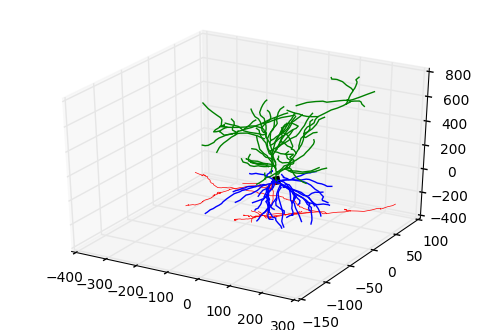

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')

for neurite in neurites:
    plot(m, ax, projection='3d', 
         neurites=[neurite], 
         color=colors[neurite], 
         linewidth=thickness[neurite])

### Plotting 2D projections

In [10]:
from morphon import Morpho, plot
m = Morpho('in.swc')

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

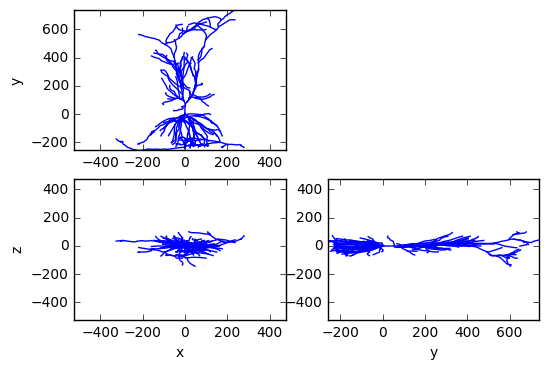

In [12]:
fig = plt.figure()
ax = plt.subplot(2, 2, 1)
ax.set_ylabel('y')
plot(m, ax, projection='xy', equal_scales=True)
ax = plt.subplot(2, 2, 3)
ax.set_ylabel('z')
ax.set_xlabel('x')
plot(m, ax, projection='xz', equal_scales=True)
ax = plt.subplot(2, 2, 4)
ax.set_xlabel('y')
plot(m, ax, projection='yz', equal_scales=True)

## Morphometric analysis

### Measuring morphological features

In [13]:
from morphon import Morpho, measure
m = Morpho('in.swc')

Calculate the total value of a specified feature for all neurites...

In [14]:
measure(m, features=['length'])

{'length': 15591.4951435324}

or for a specified neurite.

In [15]:
neurites = set(m.neurite(i) for i in m.points())
for neurite in neurites:
    idents = m.points(neurites=[neurite])
    print neurite, measure(m, features=['area'], idents=idents)

soma {'area': 577.1491768179294}
axon {'area': 2596.675724039364}
dend {'area': 5811.0463075152566}
apic {'area': 8784.5236639362975}


### Analysing neurites

In [16]:
from morphon import Morpho, measure
m = Morpho('in.swc')

In [17]:
neurites = set(m.neurite(i) for i in m.points())
morphometrics = {}

In [18]:
morphometrics['total'] = measure(m)
for neurite in neurites:
    idents = m.points(neurites=[neurite])
    morphometrics[neurite] = measure(m, idents=idents)

In [19]:
import pandas
df = pandas.DataFrame(morphometrics)
df[9:13]

,apic,axon,dend,soma,total
number_of_bifurcations,54,36,29,0,119
number_of_branches,NaN,NaN,NaN,NaN,248
number_of_stems,NaN,NaN,NaN,NaN,7
number_of_tips,55,38,33,2,128


Note that some values, for example `number_of_branches` or `number_of_stems`, can't be evaluated for predefined nodes `idents=...` in the function call `measure()` as above. In order to analize the tree structure, one should call it specifying only a starting node ID `ident=...` or `None` as in evaluation of the total values above.

In [20]:
for neurite in neurites:
    morphometrics[neurite]['number_of_branches'] = 0
    morphometrics[neurite]['number_of_stems'] = 0

In [21]:
stems = m.stems()
for stem in stems:
    neurite = m.neurite(stem)
    feature_value = measure(m, ident=stem, features=['number_of_branches'])
    morphometrics[neurite]['number_of_branches'] += feature_value['number_of_branches']
    morphometrics[neurite]['number_of_stems'] += 1
    print neurite, '[%4s]' % stem, feature_value

apic [   4] {'number_of_branches': 109}
dend [ 553] {'number_of_branches': 19}
dend [ 659] {'number_of_branches': 15}
dend [ 752] {'number_of_branches': 11}
dend [ 817] {'number_of_branches': 17}
axon [ 937] {'number_of_branches': 59}
axon [1252] {'number_of_branches': 15}


In [22]:
pandas.DataFrame(morphometrics)

,apic,axon,dend,soma,total
area,8784.52,2596.68,5811.05,577.149,17769.4
bifurcation_angle,"(0.855405036065, 0.411924416813, 0.32542027287...","(1.66640211427, 0.64800030166, 0.437419361915,...","(0.907123808459, 0.620856980565, 0.16913539597...",NaN,"(1.11335242442, 0.656546089124, 0.169135395972..."
center_position,"[4.23865209472, 353.054444444, 1.07393442623]","[-23.4995419847, -183.15783715, -9.09188295165]","[20.4224739583, -102.593541667, -5.19567708333]","[0.0, 0.0, 0.0]","[0.702731376975, 62.0390820166, -3.74617005267]"
curvature,"(0.0212652629753, 0.027574339734, 0.0, 0.22878...","(0.128089454529, 0.215047586929, 0.0, 2.822223...","(0.0265199882332, 0.0311480185001, 0.0, 0.1640...","(0.0, 0.0, 0.0, 0.0)","(0.0543246504779, 0.128686719567, 0.0, 2.82222..."
degree,"(1, 55)","(1, 30)","(1, 10)","(1, 128)","(1, 128)"
effective_diameter,0.340595,0.356514,0.366297,13.5566,0.362773
euclidean_extent,"[455.23, 731.8, 244.43]","[603.13, 252.91, 142.03]","[314.42, 249.0, 136.82]","[0.92, 13.52, 0.08]","[603.13, 998.27, 244.43]"
length,8209.76,2318.41,5049.77,13.5515,15591.5
local_diameter,"(0.32276867031, 0.137803426567, 0.3, 2.9)","(0.3, 5.55111512313e-17, 0.3, 0.3)","(0.308854166667, 0.0643455805214, 0.3, 1.2)","(13.5566, 1.7763568394e-15, 13.5566, 13.5566)","(0.341888487585, 0.635784181285, 0.3, 13.5566)"
number_of_bifurcations,54,36,29,0,119


### Scholl analysis

In [23]:
from morphon import Morpho, scholl
m = Morpho('in.swc')
neurites = set(m.neurite(i) for i in m.points())

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

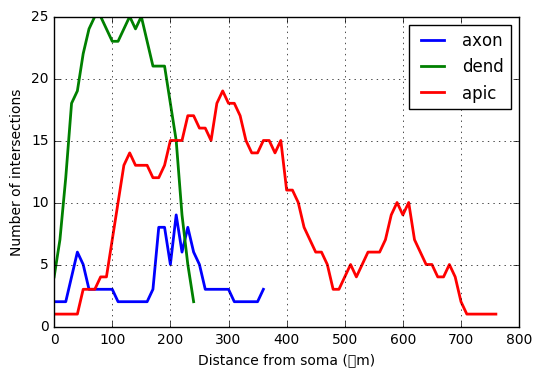

In [25]:
fig, ax = plt.subplots()
ax.set_xlabel(u'Distance from soma (μm)')
ax.set_ylabel('Number of intersections')
for neurite in neurites:
    if neurite is 'soma': continue
    r, x = scholl(m, neurites=[neurite], h=10)
    plt.plot(r, x, label=neurite, lw=2)
plt.legend()
plt.grid(True)

### Collecting feature statistsics

## Manipulating morphologies

### Create simple morphology

### Clone morphology

### Neurites pruning

### Editing morphology

### Assembling new morphology from pools of neurites

...

In [26]:
import morphon

Load morphology file [in.swc](./in.swc)

In [27]:
m = morphon.Morpho('in.swc')

Do basic morphometric analysis of the whole cell.

In [28]:
metrics = morphon.measure(m)

In [29]:
import json
print json.dumps(metrics, indent=4, sort_keys=True)

{
    "area": 17769.394872308891, 
    "bifurcation_angle": [
        1.1133524244246431, 
        0.65654608912431689, 
        0.1691353959724157, 
        2.9987570302548723
    ], 
    "center_position": [
        0.7027313769751637, 
        62.03908201655406, 
        -3.7461700526711796
    ], 
    "curvature": [
        0.05432465047785557, 
        0.12868671956671554, 
        0.0, 
        2.8222230350095341
    ], 
    "degree": [
        1, 
        128
    ], 
    "effective_diameter": 0.36277303794727778, 
    "euclidean_extent": [
        603.13, 
        998.26999999999998, 
        244.43000000000001
    ], 
    "length": 15591.4951435324, 
    "local_diameter": [
        0.34188848758465007, 
        0.63578418128497416, 
        0.29999999999999999, 
        13.5566
    ], 
    "number_of_bifurcations": 119, 
    "number_of_branches": 248, 
    "number_of_stems": 7, 
    "number_of_tips": 128, 
    "order": [
        1, 
        23
    ], 
    "path_extent": 885.807

Plot the cell.

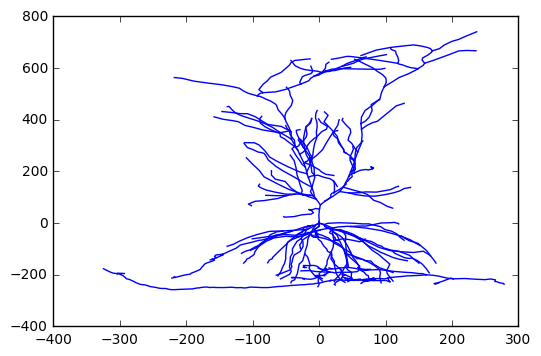

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot()
morphon.plot(m, ax)

Plot cell projections.

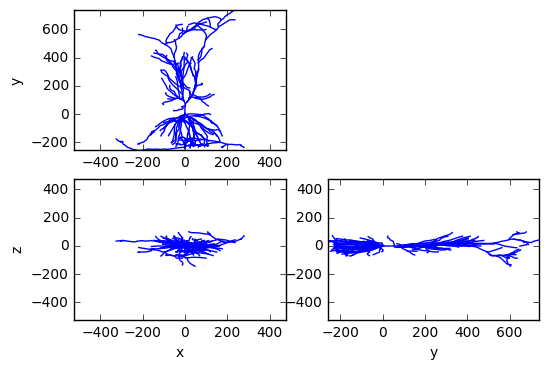

In [31]:
fig = plt.figure()
ax = plt.subplot(2, 2, 1)
ax.set_ylabel('y')
morphon.plot(m, ax, projection='xy', equal_scales=True)
ax = plt.subplot(2, 2, 3)
ax.set_ylabel('z')
ax.set_xlabel('x')
morphon.plot(m, ax, projection='xz', equal_scales=True)
ax = plt.subplot(2, 2, 4)
ax.set_xlabel('y')
morphon.plot(m, ax, projection='yz', equal_scales=True)

Make a colorful plot to distinguish different types of neurites.

In [32]:
neurites = set(m.neurite(i) for i in m.traverse())
colors = {'soma': 'black', 'dend': 'blue', 'apic': 'green', 'axon': 'red'}
thickness = {'soma': 5, 'dend': 1, 'apic': 1, 'axon': 0.5}

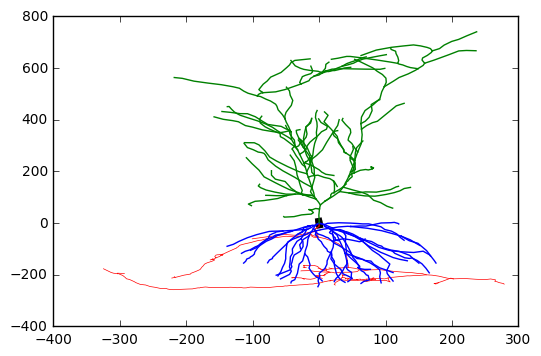

In [33]:
fig = plt.figure()
ax = plt.subplot()

for neurite in neurites:
    morphon.plot(m, ax, neurites=[neurite], 
                 color=colors[neurite], 
                 linewidth=thickness[neurite])

Do the same in 3D.

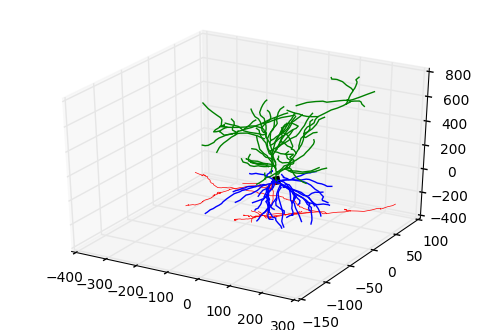

In [34]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

for neurite in neurites:
    morphon.plot(m, ax, projection='3d',
                 neurites=[neurite], 
                 color=colors[neurite], 
                 linewidth=thickness[neurite])

There is a set of primitives for manipulating morphology trees, e.g. to copy, prune or graft individual branches. Below is an example of pruning random subtrees, shown in red.

In [35]:
import random

n = m.copy()
branch_starts = [b[0] for b in n.branches()]
for repetition in range(5):
    b = random.choice(branch_starts)
    i = branch_starts.index(b)
    branch_starts.pop(i)
    n.prune(b) 

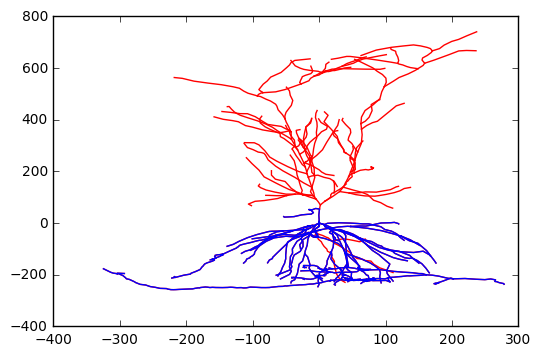

In [36]:
fig, ax = plt.subplots()
morphon.plot(m, ax, color='red')
morphon.plot(n, ax)

...

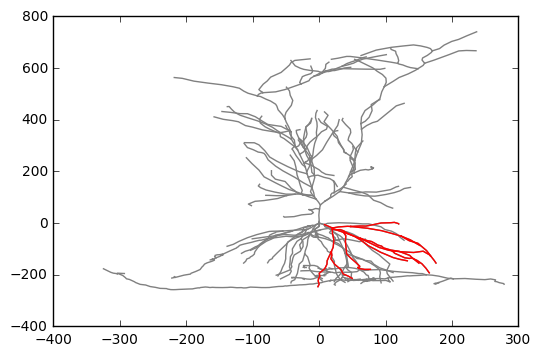

In [37]:
subtree = m.copy(553)
fig, ax = plt.subplots()
morphon.plot(m, ax, color='grey')
morphon.plot(subtree, ax, color='red')

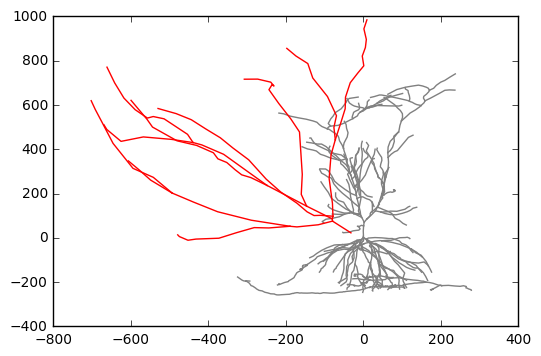

In [38]:
subtree.rotate((0,0,1), 3.14)
subtree.scale(4)
fig, ax = plt.subplots()
morphon.plot(m, ax, color='grey')
morphon.plot(subtree, ax, color='red')

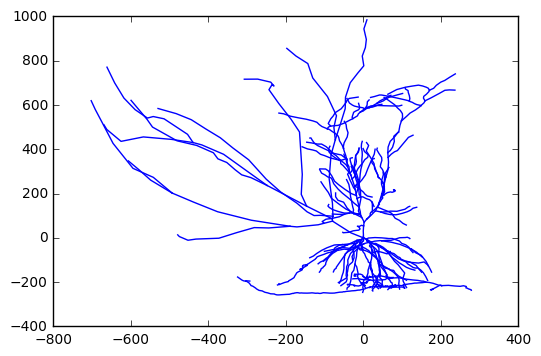

In [39]:
m.graft(m.root(), subtree)
fig, ax = plt.subplots()
morphon.plot(m, ax)